In [1]:
import pandas as pd
import numpy as np
import json
import ast
import re
import time
import matplotlib.pyplot as plt
from sklearn import preprocessing
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage
#from icecream import ic
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
#original cluster Count
def get_cpc_cluster_count(prediction_df, label, cpc_stem='Y02E10', **kwargs):
    filtered_df = prediction_df[prediction_df.Y == label]
    filtered_cpc_codes = filtered_df.cpc_codes
    cpc_codes_by_label = [ast.literal_eval(row) for row in filtered_cpc_codes]
    cpc_codes_by_label_flat = [item for elem in cpc_codes_by_label for item in elem]
    cpc_series = pd.Series(cpc_codes_by_label_flat)
    cpc_stem_series = cpc_series[cpc_series.str.startswith(cpc_stem)]
    print(f'CLUSTER {label}')
    print(cpc_stem_series.value_counts(**kwargs))
    

In [3]:
def get_cpc_cluster_count1(prediction_df, label, cpc_stem='Y02E10', **kwargs):
    filtered_df = prediction_df[prediction_df.Y == label]
    filtered_cpc_codes = filtered_df.cpc_codes
    cpc_codes_by_label = [ast.literal_eval(row) for row in filtered_cpc_codes]
    cpc_codes_by_label_flat = [item for elem in cpc_codes_by_label for item in elem]
    cpc_series = pd.Series(cpc_codes_by_label_flat)
    cpc_stem_series = cpc_series[cpc_series.str.startswith(cpc_stem)]
#     print(f'CLUSTER {label}')
    cluster_count = cpc_stem_series.value_counts(**kwargs)
    return cluster_count

# TP1 1980 - 1995

In [13]:
df = pd.read_csv('atp1_with_citation_vectors.csv', index_col=0)
#df_vector = df.drop(columns=['original_index','lens_id','date_published','cpc_codes','cpc_codes_3','cited_by','patent_count', 'cited_by.1','patent_count.1'])
df_vector = df.drop(columns=['original_index','lens_id','date_published','cpc_codes','cpc_codes_3','cited_by','patent_count', 'cited_by.1','patent_count.1','invention_title'])


df_dropped = df_vector.loc[(df_vector!=0).any(axis=1)]
df_dropped = df_dropped.loc[:, (df_dropped != 0).any(axis=0)]

df_dropped.replace([np.inf, -np.inf], np.nan, inplace=True)
df_dropped = df_dropped.fillna(0)
df_dropped.isnull().sum(axis = 0)


df_vector_cpc = df.drop(columns=['original_index','lens_id','date_published','cpc_codes_3','cited_by','patent_count', 'cited_by.1','patent_count.1'])
#df_vector_cpc = df.drop(columns=['original_index','lens_id','date_published','cpc_codes_3','cited_by','patent_count', 'cited_by.1','patent_count.1','invention_title'])
df_cpc = df_vector_cpc[['cpc_codes','invention_title']]

df_vector_cpc = df_dropped.join(df_cpc)
df_vector_cpc = df_vector_cpc.reset_index(inplace = False) #remember to re index prior to merge with predictions
df_vector_cpc


# normalize the data attributes
df_normalized = preprocessing.normalize(df_dropped)
data_normalized = pd.DataFrame(df_normalized, columns=df_dropped.columns)
X = data_normalized 

In [5]:
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters= 3,distance_threshold= None, affinity = 'euclidean', linkage ='ward')
y_tp1 = hc.fit_predict(X)
y_tp1 = pd.DataFrame(y_tp1, columns = ['Y'])
y_tp1

,Y
0,1
1,0
2,2
3,0
4,1
...,...
3674,2
3675,2
3676,2
3677,2


In [6]:
df_combined_1 = df_vector_cpc.join(y_tp1)
tp1_predictions = df_combined_1[['cpc_codes','Y','invention_title']]
tp1_predictions

,cpc_codes,Y,invention_title
0,"['F03B13/105', 'F03B13/105', 'F03B3/128', 'F03...",1,['Rotor withdrawal arrangement for bulb genera...
1,"['F24S10/10', 'Y02E10/44']",0,['Polymer-gel covered solar energy collector a...
2,"['H01L31/03921', 'H01L31/062', 'H01L31/075', '...",2,['Semiconductor photoelectric conversion device']
3,"['G05F1/67', 'G05F1/67', 'Y02E10/56', 'Y02E10/...",0,['Pulsed motor starter for use with a photovol...
4,"['F03D3/0409', 'F03D3/0409', 'F03D9/12', 'F03D...",1,['System for the generation of electrical ener...
...,...,...,...
3674,"['H01G9/20', 'H01M4/60', 'H01M6/181', 'H01M14/...",2,['Method for production of photoelectrochemica...
3675,"['H01L31/0693', 'H01L31/022425', 'H01L31/02245...",2,['Solar cells and method for producing solar c...
3676,"['H01L31/077', 'H01L31/077', 'H01L21/02422', '...",2,['Method of making pin junction semiconductor ...
3677,"['H01L31/065', 'H01L31/065', 'H01L31/0352', 'H...",2,['Pin junction photovoltaic element having an ...


In [7]:
for i in range(3):
    get_cpc_cluster_count(tp1_predictions, i, cpc_stem='Y02E10/')
    print()
    
#need a sum of all the tags that go into clusters 

CLUSTER 0
Y02E10/44     922
Y02E10/40     917
Y02E10/47     542
Y02E10/10     154
Y02E10/46     133
Y02E10/52     124
Y02E10/50      70
Y02E10/56      64
Y02E10/60      49
Y02E10/72      17
Y02E10/30      12
Y02E10/728      5
Y02E10/548      4
Y02E10/546      3
Y02E10/727      2
Y02E10/74       2
Y02E10/547      2
Y02E10/20       2
dtype: int64

CLUSTER 1
Y02E10/72     524
Y02E10/30     452
Y02E10/20     360
Y02E10/74     196
Y02E10/728    138
Y02E10/46      64
Y02E10/70      34
Y02E10/44      14
Y02E10/40      12
Y02E10/727     11
Y02E10/10      10
Y02E10/76       9
Y02E10/56       8
Y02E10/47       6
Y02E10/50       5
Y02E10/52       3
Y02E10/549      2
dtype: int64

CLUSTER 2
Y02E10/50     570
Y02E10/548    350
Y02E10/547    250
Y02E10/52     146
Y02E10/544    115
Y02E10/543     72
Y02E10/546     55
Y02E10/541     44
Y02E10/549     30
Y02E10/40      26
Y02E10/542     18
Y02E10/44      16
Y02E10/47       9
Y02E10/60       9
Y02E10/56       6
Y02E10/545      5
Y02E10/30       2
dtype:

In [8]:
def get_total_cluster_counts(prediction_df, cpc_stem='Y02E10', **kwargs):
#     filtered_df = prediction_df[prediction_df.Y == label]
    filtered_cpc_codes = prediction_df.cpc_codes
    cpc_codes_by_label = [ast.literal_eval(row) for row in filtered_cpc_codes]
    cpc_codes_by_label_flat = [item for elem in cpc_codes_by_label for item in elem]
    cpc_series = pd.Series(cpc_codes_by_label_flat)
    cpc_stem_series = cpc_series[cpc_series.str.startswith(cpc_stem)]
#     print(f'TOTAL CLUSTER COUNTS')
#     print(cpc_stem_series.value_counts(**kwargs))
    total_cluster_counts = cpc_stem_series.value_counts(**kwargs)
#     cluster_counts.to_csv('cluster_counts.csv')
    return total_cluster_counts

In [9]:
get_cpc_cluster_count1(tp1_predictions, 0) / get_total_cluster_counts(tp1_predictions)

Y02E10/10     0.939024
Y02E10/20     0.005525
Y02E10/30     0.025751
Y02E10/40     0.960209
Y02E10/44     0.968487
Y02E10/46     0.675127
Y02E10/47     0.973070
Y02E10/50     0.108527
Y02E10/52     0.454212
Y02E10/541         NaN
Y02E10/542         NaN
Y02E10/543         NaN
Y02E10/544         NaN
Y02E10/545         NaN
Y02E10/546    0.051724
Y02E10/547    0.007937
Y02E10/548    0.011299
Y02E10/549         NaN
Y02E10/56     0.820513
Y02E10/60     0.844828
Y02E10/70          NaN
Y02E10/72     0.031423
Y02E10/727    0.153846
Y02E10/728    0.034965
Y02E10/74     0.010101
Y02E10/76          NaN
dtype: float64

In [10]:
get_cpc_cluster_count1(tp1_predictions, 1) / get_total_cluster_counts(tp1_predictions)

Y02E10/10     0.060976
Y02E10/20     0.994475
Y02E10/30     0.969957
Y02E10/40     0.012565
Y02E10/44     0.014706
Y02E10/46     0.324873
Y02E10/47     0.010772
Y02E10/50     0.007752
Y02E10/52     0.010989
Y02E10/541         NaN
Y02E10/542         NaN
Y02E10/543         NaN
Y02E10/544         NaN
Y02E10/545         NaN
Y02E10/546         NaN
Y02E10/547         NaN
Y02E10/548         NaN
Y02E10/549    0.062500
Y02E10/56     0.102564
Y02E10/60          NaN
Y02E10/70     1.000000
Y02E10/72     0.968577
Y02E10/727    0.846154
Y02E10/728    0.965035
Y02E10/74     0.989899
Y02E10/76     1.000000
dtype: float64

In [11]:
get_cpc_cluster_count1(tp1_predictions, 2) / get_total_cluster_counts(tp1_predictions)

Y02E10/10          NaN
Y02E10/20          NaN
Y02E10/30     0.004292
Y02E10/40     0.027225
Y02E10/44     0.016807
Y02E10/46          NaN
Y02E10/47     0.016158
Y02E10/50     0.883721
Y02E10/52     0.534799
Y02E10/541    1.000000
Y02E10/542    1.000000
Y02E10/543    1.000000
Y02E10/544    1.000000
Y02E10/545    1.000000
Y02E10/546    0.948276
Y02E10/547    0.992063
Y02E10/548    0.988701
Y02E10/549    0.937500
Y02E10/56     0.076923
Y02E10/60     0.155172
Y02E10/70          NaN
Y02E10/72          NaN
Y02E10/727         NaN
Y02E10/728         NaN
Y02E10/74          NaN
Y02E10/76          NaN
dtype: float64

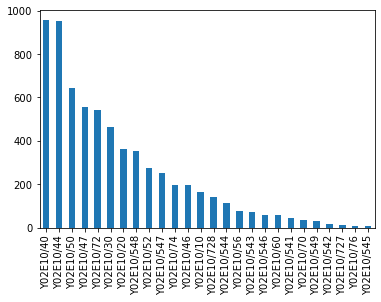

In [12]:
get_total_cluster_counts(tp1_predictions).plot(kind='bar')
plt.show()

# TP2 1980 - 2008

In [15]:
df = pd.read_csv('atp2_with_citation_vectors.csv', index_col=0)
#df_vector = df.drop(columns=['original_index','lens_id','date_published','cpc_codes','cpc_codes_3','cited_by','patent_count', 'cited_by.1','patent_count.1'])
df_vector = df.drop(columns=['original_index','lens_id','date_published','cpc_codes','cpc_codes_3','cited_by','patent_count', 'cited_by.1','patent_count.1','invention_title'])


df_dropped = df_vector.loc[(df_vector!=0).any(axis=1)]
df_dropped = df_dropped.loc[:, (df_dropped != 0).any(axis=0)]

df_dropped.replace([np.inf, -np.inf], np.nan, inplace=True)
df_dropped = df_dropped.fillna(0)
df_dropped.isnull().sum(axis = 0)


df_vector_cpc = df.drop(columns=['original_index','lens_id','date_published','cpc_codes_3','cited_by','patent_count', 'cited_by.1','patent_count.1'])
#df_vector_cpc = df.drop(columns=['original_index','lens_id','date_published','cpc_codes_3','cited_by','patent_count', 'cited_by.1','patent_count.1','invention_title'])
df_cpc = df_vector_cpc[['cpc_codes','invention_title']]

df_vector_cpc = df_dropped.join(df_cpc)
df_vector_cpc = df_vector_cpc.reset_index(inplace = False) #remember to re index prior to merge with predictions
df_vector_cpc


# normalize the data attributes
df_normalized = preprocessing.normalize(df_dropped)
data_normalized = pd.DataFrame(df_normalized, columns=df_dropped.columns)
X = data_normalized 

In [16]:
hc = AgglomerativeClustering(n_clusters= 3,distance_threshold= None, affinity = 'euclidean', linkage ='ward')
y_tp2 = hc.fit_predict(X)
y_tp2 = pd.DataFrame(y_tp2, columns = ['Y'])
y_tp2

,Y
0,1
1,1
2,0
3,2
4,0
...,...
13070,2
13071,2
13072,2
13073,1


In [17]:
df_combined_2 = df_vector_cpc.join(y_tp2)
tp2_predictions = df_combined_2[['cpc_codes','Y','invention_title']]
tp2_predictions

,cpc_codes,Y,invention_title
0,"['F03B13/105', 'F03B13/105', 'F03B3/128', 'F03...",1,['Rotor withdrawal arrangement for bulb genera...
1,"['F03B7/00', 'F03B7/00', 'F03B11/002', 'F03B11...",1,['Recirculating submersible turbine']
2,"['F24S10/10', 'Y02E10/44']",0,['Polymer-gel covered solar energy collector a...
3,"['H01L31/03921', 'H01L31/062', 'H01L31/075', '...",2,['Semiconductor photoelectric conversion device']
4,"['G05F1/67', 'G05F1/67', 'Y02E10/56', 'Y02E10/...",0,['Pulsed motor starter for use with a photovol...
...,...,...,...
13070,"['H01L31/0512', 'H01L31/0508', 'Y02E10/50']",2,['Solar cell module']
13071,"['B82Y10/00', 'B82Y10/00', 'H01L27/302', 'H01L...",2,['ORGANIC HYBRID PLANAR-NANOCRYSTALLINE BULK H...
13072,"['H01J37/185', 'H01L21/67754', 'H01L21/67754',...",2,['METHOD AND SYSTEM FOR CONTINUOUS LARGE-AREA ...
13073,"['F03D7/0284', 'F03D7/0284', 'F03D7/0224', 'F0...",1,['Power system with low voltage ride-through c...


In [165]:
for i in range(3):
    get_cpc_cluster_count(tp2_predictions, i, cpc_stem='Y02E10/')
    print()
    
#need a sum of all the tags that go into clusters 

CLUSTER 0
Y02E10/40     1819
Y02E10/44     1647
Y02E10/47     1464
Y02E10/50     1048
Y02E10/56      575
Y02E10/52      531
Y02E10/10      462
Y02E10/46      364
Y02E10/60      178
Y02E10/72      114
Y02E10/76      102
Y02E10/549      42
Y02E10/547      41
Y02E10/548      36
Y02E10/20       26
Y02E10/541      25
Y02E10/542      23
Y02E10/30       20
Y02E10/546      15
Y02E10/543      14
Y02E10/544      14
Y02E10/728      10
Y02E10/74        5
Y02E10/545       4
Y02E10/727       2
Y02E10/70        2
dtype: int64

CLUSTER 1
Y02E10/72     3320
Y02E10/30     1473
Y02E10/20     1362
Y02E10/728     926
Y02E10/74      733
Y02E10/76      331
Y02E10/46      322
Y02E10/727     145
Y02E10/70      112
Y02E10/56       91
Y02E10/10       81
Y02E10/50       71
Y02E10/44       60
Y02E10/40       49
Y02E10/47       33
Y02E10/52        5
Y02E10/549       3
Y02E10/60        1
dtype: int64

CLUSTER 2
Y02E10/50     1577
Y02E10/547    1301
Y02E10/549    1235
Y02E10/548    1069
Y02E10/542     628
Y02E10/52  

In [167]:
def get_total_cluster_counts(prediction_df, cpc_stem='Y02E10', **kwargs):
#     filtered_df = prediction_df[prediction_df.Y == label]
    filtered_cpc_codes = prediction_df.cpc_codes
    cpc_codes_by_label = [ast.literal_eval(row) for row in filtered_cpc_codes]
    cpc_codes_by_label_flat = [item for elem in cpc_codes_by_label for item in elem]
    cpc_series = pd.Series(cpc_codes_by_label_flat)
    cpc_stem_series = cpc_series[cpc_series.str.startswith(cpc_stem)]
#     print(f'TOTAL CLUSTER COUNTS')
#     print(cpc_stem_series.value_counts(**kwargs))
    total_cluster_counts = cpc_stem_series.value_counts(**kwargs)
#     cluster_counts.to_csv('cluster_counts.csv')
    return total_cluster_counts

In [168]:
get_cpc_cluster_count1(tp2_predictions, 0) / get_total_cluster_counts(tp2_predictions)

Y02E10/10     0.850829
Y02E10/20     0.018732
Y02E10/30     0.013342
Y02E10/40     0.927588
Y02E10/44     0.933673
Y02E10/46     0.522989
Y02E10/47     0.953746
Y02E10/50     0.388724
Y02E10/52     0.459343
Y02E10/541    0.049900
Y02E10/542    0.035330
Y02E10/543    0.061674
Y02E10/544    0.032941
Y02E10/545    0.022857
Y02E10/546    0.045593
Y02E10/547    0.030551
Y02E10/548    0.032579
Y02E10/549    0.032813
Y02E10/56     0.836972
Y02E10/60     0.881188
Y02E10/70     0.017544
Y02E10/72     0.033178
Y02E10/727    0.013605
Y02E10/728    0.010684
Y02E10/74     0.006775
Y02E10/76     0.235566
dtype: float64

In [169]:
get_cpc_cluster_count1(tp2_predictions, 1) / get_total_cluster_counts(tp2_predictions)

Y02E10/10     0.149171
Y02E10/20     0.981268
Y02E10/30     0.982655
Y02E10/40     0.024987
Y02E10/44     0.034014
Y02E10/46     0.462644
Y02E10/47     0.021498
Y02E10/50     0.026335
Y02E10/52     0.004325
Y02E10/541         NaN
Y02E10/542         NaN
Y02E10/543         NaN
Y02E10/544         NaN
Y02E10/545         NaN
Y02E10/546         NaN
Y02E10/547         NaN
Y02E10/548         NaN
Y02E10/549    0.002344
Y02E10/56     0.132460
Y02E10/60     0.004950
Y02E10/70     0.982456
Y02E10/72     0.966240
Y02E10/727    0.986395
Y02E10/728    0.989316
Y02E10/74     0.993225
Y02E10/76     0.764434
dtype: float64

In [170]:
get_cpc_cluster_count1(tp2_predictions, 2) / get_total_cluster_counts(tp2_predictions)

Y02E10/10          NaN
Y02E10/20          NaN
Y02E10/30     0.004003
Y02E10/40     0.047425
Y02E10/44     0.032313
Y02E10/46     0.014368
Y02E10/47     0.024756
Y02E10/50     0.584941
Y02E10/52     0.536332
Y02E10/541    0.950100
Y02E10/542    0.964670
Y02E10/543    0.938326
Y02E10/544    0.967059
Y02E10/545    0.977143
Y02E10/546    0.954407
Y02E10/547    0.969449
Y02E10/548    0.967421
Y02E10/549    0.964844
Y02E10/56     0.030568
Y02E10/60     0.113861
Y02E10/70          NaN
Y02E10/72     0.000582
Y02E10/727         NaN
Y02E10/728         NaN
Y02E10/74          NaN
Y02E10/76          NaN
dtype: float64

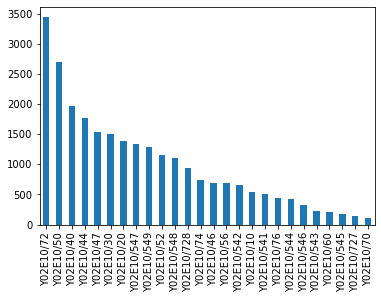

In [171]:
get_total_cluster_counts(tp2_predictions).plot(kind='bar')
plt.show()

# TP3 1980 - 2011

In [181]:
df = pd.read_csv('atp3_with_citation_vectors.csv', index_col=0)
#df_vector = df.drop(columns=['original_index','lens_id','date_published','cpc_codes','cpc_codes_3','cited_by','patent_count', 'cited_by.1','patent_count.1'])
df_vector = df.drop(columns=['original_index','lens_id','date_published','cpc_codes','cpc_codes_3','cited_by','patent_count', 'cited_by.1','patent_count.1','invention_title'])


df_dropped = df_vector.loc[(df_vector!=0).any(axis=1)]
df_dropped = df_dropped.loc[:, (df_dropped != 0).any(axis=0)]

df_dropped.replace([np.inf, -np.inf], np.nan, inplace=True)
df_dropped = df_dropped.fillna(0)
df_dropped.isnull().sum(axis = 0)


df_vector_cpc = df.drop(columns=['original_index','lens_id','date_published','cpc_codes_3','cited_by','patent_count', 'cited_by.1','patent_count.1'])
#df_vector_cpc = df.drop(columns=['original_index','lens_id','date_published','cpc_codes_3','cited_by','patent_count', 'cited_by.1','patent_count.1','invention_title'])
df_cpc = df_vector_cpc[['cpc_codes','invention_title']]

df_vector_cpc = df_dropped.join(df_cpc)
df_vector_cpc = df_vector_cpc.reset_index(inplace = False) #remember to re index prior to merge with predictions
df_vector_cpc


# normalize the data attributes
df_normalized = preprocessing.normalize(df_dropped)
data_normalized = pd.DataFrame(df_normalized, columns=df_dropped.columns)
X = data_normalized 

In [173]:
hc = AgglomerativeClustering(n_clusters= 3,distance_threshold= None, affinity = 'euclidean', linkage ='ward')
y_tp3 = hc.fit_predict(X)
y_tp3 = pd.DataFrame(y_tp3, columns = ['Y'])
y_tp3

,Y
0,1
1,1
2,0
3,2
4,0
...,...
24550,0
24551,2
24552,0
24553,2


In [174]:
df_combined_3 = df_vector_cpc.join(y_tp3)
tp3_predictions = df_combined_3[['cpc_codes','Y','invention_title']]
tp3_predictions

,cpc_codes,Y,invention_title
0,"['F03B13/105', 'F03B13/105', 'F03B3/128', 'F03...",1,['Rotor withdrawal arrangement for bulb genera...
1,"['F03B7/00', 'F03B7/00', 'F03B11/002', 'F03B11...",1,['Recirculating submersible turbine']
2,"['F24S10/10', 'Y02E10/44']",0,['Polymer-gel covered solar energy collector a...
3,"['H01L31/03921', 'H01L31/062', 'H01L31/075', '...",2,['Semiconductor photoelectric conversion device']
4,"['G05F1/67', 'G05F1/67', 'Y02E10/56', 'Y02E10/...",0,['Pulsed motor starter for use with a photovol...
...,...,...,...
24550,"['F24S25/61', 'F24S25/61', 'H01L31/048', 'H02S...",0,['Photovoltaic Roofing Elements']
24551,"['H01L31/046', 'H01L31/046', 'H01L31/03928', '...",2,['CHALCOPYRITE TYPE SOLAR CELL']
24552,"['F16L9/19', 'F16L9/19', 'F16L9/006', 'F16L9/0...",0,['GEOTHERMAL PIPE SYSTEM']
24553,"['C09K3/10', 'C09K2200/0647', 'H01G9/2031', 'H...",2,['Sealing Agent for Photoelectric Converter an...


In [175]:
for i in range(3):
    get_cpc_cluster_count(tp3_predictions, i, cpc_stem='Y02E10/')
    print()
    
#need a sum of all the tags that go into clusters 

CLUSTER 0
Y02E10/47     3036
Y02E10/40     2694
Y02E10/44     2385
Y02E10/50     2270
Y02E10/56     1406
Y02E10/52     1198
Y02E10/10      810
Y02E10/46      798
Y02E10/76      367
Y02E10/72      348
Y02E10/60      337
Y02E10/30      185
Y02E10/20      165
Y02E10/728      74
Y02E10/547      71
Y02E10/548      66
Y02E10/549      56
Y02E10/542      50
Y02E10/544      39
Y02E10/541      33
Y02E10/74       25
Y02E10/543      14
Y02E10/545      10
Y02E10/546      10
Y02E10/70        7
Y02E10/727       7
Y02E10/00        1
dtype: int64

CLUSTER 1
Y02E10/72     8176
Y02E10/30     2591
Y02E10/20     2194
Y02E10/728    2000
Y02E10/74     1430
Y02E10/76      785
Y02E10/46      447
Y02E10/727     353
Y02E10/70      278
Y02E10/56      176
Y02E10/50      172
Y02E10/10       98
Y02E10/44       63
Y02E10/47       51
Y02E10/40       47
Y02E10/52       10
Y02E10/60        9
Y02E10/542       4
Y02E10/00        2
Y02E10/548       2
Y02E10/547       1
Y02E10/549       1
dtype: int64

CLUSTER 2
Y02E10/50  

In [176]:
get_cpc_cluster_count1(tp3_predictions, 0) / get_total_cluster_counts(tp3_predictions)

Y02E10/00     0.333333
Y02E10/10     0.892070
Y02E10/20     0.069945
Y02E10/30     0.066547
Y02E10/40     0.936392
Y02E10/44     0.944929
Y02E10/46     0.637380
Y02E10/47     0.961977
Y02E10/50     0.427656
Y02E10/52     0.485020
Y02E10/541    0.027318
Y02E10/542    0.037936
Y02E10/543    0.034913
Y02E10/544    0.044168
Y02E10/545    0.028571
Y02E10/546    0.018282
Y02E10/547    0.026151
Y02E10/548    0.039521
Y02E10/549    0.021440
Y02E10/56     0.862577
Y02E10/60     0.891534
Y02E10/70     0.024561
Y02E10/72     0.040788
Y02E10/727    0.019444
Y02E10/728    0.035680
Y02E10/74     0.017182
Y02E10/76     0.317474
dtype: float64

In [177]:
get_cpc_cluster_count1(tp3_predictions, `1) / get_total_cluster_counts(tp3_predictions)

Y02E10/00     0.666667
Y02E10/10     0.107930
Y02E10/20     0.930055
Y02E10/30     0.932014
Y02E10/40     0.016336
Y02E10/44     0.024960
Y02E10/46     0.357029
Y02E10/47     0.016160
Y02E10/50     0.032404
Y02E10/52     0.004049
Y02E10/541         NaN
Y02E10/542    0.003035
Y02E10/543         NaN
Y02E10/544         NaN
Y02E10/545         NaN
Y02E10/546         NaN
Y02E10/547    0.000368
Y02E10/548    0.001198
Y02E10/549    0.000383
Y02E10/56     0.107975
Y02E10/60     0.023810
Y02E10/70     0.975439
Y02E10/72     0.958275
Y02E10/727    0.980556
Y02E10/728    0.964320
Y02E10/74     0.982818
Y02E10/76     0.679066
dtype: float64

In [178]:
get_cpc_cluster_count1(tp3_predictions, 2) / get_total_cluster_counts(tp3_predictions)

Y02E10/00          NaN
Y02E10/10          NaN
Y02E10/20          NaN
Y02E10/30     0.001439
Y02E10/40     0.047271
Y02E10/44     0.030111
Y02E10/46     0.005591
Y02E10/47     0.021863
Y02E10/50     0.539940
Y02E10/52     0.510931
Y02E10/541    0.972682
Y02E10/542    0.959029
Y02E10/543    0.965087
Y02E10/544    0.955832
Y02E10/545    0.971429
Y02E10/546    0.981718
Y02E10/547    0.973481
Y02E10/548    0.959281
Y02E10/549    0.978178
Y02E10/56     0.029448
Y02E10/60     0.084656
Y02E10/70          NaN
Y02E10/72     0.000938
Y02E10/727         NaN
Y02E10/728         NaN
Y02E10/74          NaN
Y02E10/76     0.003460
dtype: float64

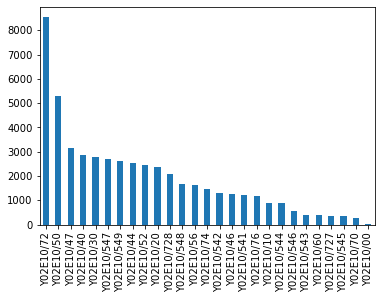

In [179]:
get_total_cluster_counts(tp3_predictions).plot(kind='bar')
plt.show()

# TP4 1980 - 2014

In [182]:
df = pd.read_csv('atp4_with_citation_vectors.csv', index_col=0)
#df_vector = df.drop(columns=['original_index','lens_id','date_published','cpc_codes','cpc_codes_3','cited_by','patent_count', 'cited_by.1','patent_count.1'])
df_vector = df.drop(columns=['original_index','lens_id','date_published','cpc_codes','cpc_codes_3','cited_by','patent_count', 'cited_by.1','patent_count.1','invention_title'])


df_dropped = df_vector.loc[(df_vector!=0).any(axis=1)]
df_dropped = df_dropped.loc[:, (df_dropped != 0).any(axis=0)]

df_dropped.replace([np.inf, -np.inf], np.nan, inplace=True)
df_dropped = df_dropped.fillna(0)
df_dropped.isnull().sum(axis = 0)


df_vector_cpc = df.drop(columns=['original_index','lens_id','date_published','cpc_codes_3','cited_by','patent_count', 'cited_by.1','patent_count.1'])
#df_vector_cpc = df.drop(columns=['original_index','lens_id','date_published','cpc_codes_3','cited_by','patent_count', 'cited_by.1','patent_count.1','invention_title'])
df_cpc = df_vector_cpc[['cpc_codes','invention_title']]

df_vector_cpc = df_dropped.join(df_cpc)
df_vector_cpc = df_vector_cpc.reset_index(inplace = False) #remember to re index prior to merge with predictions
df_vector_cpc


# normalize the data attributes
df_normalized = preprocessing.normalize(df_dropped)
data_normalized = pd.DataFrame(df_normalized, columns=df_dropped.columns)
X = data_normalized 

In [183]:
hc = AgglomerativeClustering(n_clusters= 3,distance_threshold= None, affinity = 'euclidean', linkage ='ward')
y_tp4 = hc.fit_predict(X)
y_tp4 = pd.DataFrame(y_tp4, columns = ['Y'])
y_tp4

,Y
0,1
1,1
2,0
3,2
4,0
...,...
37893,1
37894,2
37895,1
37896,1


In [184]:
df_combined_4 = df_vector_cpc.join(y_tp4)
tp4_predictions = df_combined_4[['cpc_codes','Y','invention_title']]
tp4_predictions

,cpc_codes,Y,invention_title
0,"['F03B13/105', 'F03B13/105', 'F03B3/128', 'F03...",1,['Rotor withdrawal arrangement for bulb genera...
1,"['F03B7/00', 'F03B7/00', 'F03B11/002', 'F03B11...",1,['Recirculating submersible turbine']
2,"['F24S10/10', 'Y02E10/44']",0,['Polymer-gel covered solar energy collector a...
3,"['H01L31/03921', 'H01L31/062', 'H01L31/075', '...",2,['Semiconductor photoelectric conversion device']
4,"['G05F1/67', 'G05F1/67', 'Y02E10/56', 'Y02E10/...",0,['Pulsed motor starter for use with a photovol...
...,...,...,...
37893,"['F03D9/25', 'F03D15/00', 'F03D15/00', 'F04D29...",1,['POWER TRANSMISSION DEVICE']
37894,"['H01L31/18', 'H01L31/02168', 'H01L31/02363', ...",2,['METHOD FOR FORMING SOLAR CELL WITH SELECTIVE...
37895,"['F03D9/25', 'F03D9/25', 'F03D80/60', 'F03D80/...",1,['DIRECT-ACTION SUPERCONDUCTING SYNCHRONOUS GE...
37896,"['F03D7/028', 'F03D3/005', 'F03D3/005', 'F03D3...",1,['MAGNET CONFIGURATIONS FOR MAGNETIC LEVITATIO...


In [185]:
for i in range(3):
    get_cpc_cluster_count(tp4_predictions, i, cpc_stem='Y02E10/')
    print()
    
#need a sum of all the tags that go into clusters 

CLUSTER 0
Y02E10/47     4761
Y02E10/50     3067
Y02E10/40     3001
Y02E10/44     2797
Y02E10/56     2533
Y02E10/10     1072
Y02E10/52      984
Y02E10/46      968
Y02E10/76      742
Y02E10/72      551
Y02E10/60      387
Y02E10/30      167
Y02E10/728      81
Y02E10/20       65
Y02E10/547      43
Y02E10/548      42
Y02E10/544      41
Y02E10/542      37
Y02E10/549      36
Y02E10/541      34
Y02E10/74       17
Y02E10/546       9
Y02E10/727       8
Y02E10/545       4
Y02E10/70        3
Y02E10/00        3
Y02E10/543       3
dtype: int64

CLUSTER 1
Y02E10/72     14001
Y02E10/30      3901
Y02E10/20      3301
Y02E10/728     3119
Y02E10/74      2137
Y02E10/76      1237
Y02E10/46       852
Y02E10/727      675
Y02E10/70       470
Y02E10/50       297
Y02E10/56       282
Y02E10/10       189
Y02E10/40       108
Y02E10/44       100
Y02E10/47        96
Y02E10/52        28
Y02E10/60        17
Y02E10/547        4
Y02E10/542        4
Y02E10/544        2
Y02E10/548        2
Y02E10/763        1
Y02E10/549   

In [186]:
get_cpc_cluster_count1(tp4_predictions, 0) / get_total_cluster_counts(tp4_predictions)

Y02E10/00     1.000000
Y02E10/10     0.847431
Y02E10/20     0.019282
Y02E10/30     0.040982
Y02E10/40     0.795178
Y02E10/44     0.869444
Y02E10/46     0.511628
Y02E10/47     0.880525
Y02E10/50     0.334752
Y02E10/52     0.255784
Y02E10/541    0.014725
Y02E10/542    0.019577
Y02E10/543    0.004498
Y02E10/544    0.030897
Y02E10/545    0.007984
Y02E10/546    0.011538
Y02E10/547    0.009788
Y02E10/548    0.018767
Y02E10/549    0.008662
Y02E10/56     0.750741
Y02E10/60     0.662671
Y02E10/70     0.006342
Y02E10/72     0.037763
Y02E10/723         NaN
Y02E10/725         NaN
Y02E10/727    0.011696
Y02E10/728    0.025249
Y02E10/74     0.007892
Y02E10/76     0.361775
Y02E10/763         NaN
dtype: float64

In [187]:
get_cpc_cluster_count1(tp4_predictions, 1) / get_total_cluster_counts(tp4_predictions)

Y02E10/00          NaN
Y02E10/10     0.149407
Y02E10/20     0.979235
Y02E10/30     0.957301
Y02E10/40     0.028617
Y02E10/44     0.031085
Y02E10/46     0.450317
Y02E10/47     0.017755
Y02E10/50     0.032417
Y02E10/52     0.007278
Y02E10/541         NaN
Y02E10/542    0.002116
Y02E10/543         NaN
Y02E10/544    0.001507
Y02E10/545    0.001996
Y02E10/546    0.001282
Y02E10/547    0.000911
Y02E10/548    0.000894
Y02E10/549    0.000241
Y02E10/56     0.083580
Y02E10/60     0.029110
Y02E10/70     0.993658
Y02E10/72     0.959564
Y02E10/723    1.000000
Y02E10/725    1.000000
Y02E10/727    0.986842
Y02E10/728    0.972257
Y02E10/74     0.992108
Y02E10/76     0.603120
Y02E10/763    1.000000
dtype: float64

In [188]:
get_cpc_cluster_count1(tp4_predictions, 2) / get_total_cluster_counts(tp4_predictions)

Y02E10/00          NaN
Y02E10/10     0.003162
Y02E10/20     0.001483
Y02E10/30     0.001718
Y02E10/40     0.176206
Y02E10/44     0.099472
Y02E10/46     0.038055
Y02E10/47     0.101720
Y02E10/50     0.632831
Y02E10/52     0.736938
Y02E10/541    0.985275
Y02E10/542    0.978307
Y02E10/543    0.995502
Y02E10/544    0.967596
Y02E10/545    0.990020
Y02E10/546    0.987179
Y02E10/547    0.989301
Y02E10/548    0.980340
Y02E10/549    0.991097
Y02E10/56     0.165679
Y02E10/60     0.308219
Y02E10/70          NaN
Y02E10/72     0.002673
Y02E10/723         NaN
Y02E10/725         NaN
Y02E10/727    0.001462
Y02E10/728    0.002494
Y02E10/74          NaN
Y02E10/76     0.035105
Y02E10/763         NaN
dtype: float64

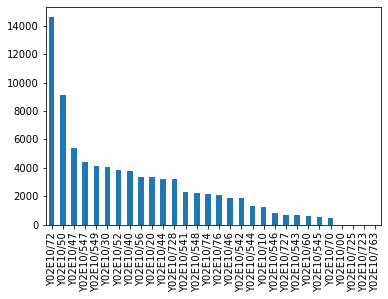

In [189]:
get_total_cluster_counts(tp4_predictions).plot(kind='bar')
plt.show()

# TP5 1980 - 2017

In [190]:
df = pd.read_csv('atp5_with_citation_vectors.csv', index_col=0)
#df_vector = df.drop(columns=['original_index','lens_id','date_published','cpc_codes','cpc_codes_3','cited_by','patent_count', 'cited_by.1','patent_count.1'])
df_vector = df.drop(columns=['original_index','lens_id','date_published','cpc_codes','cpc_codes_3','cited_by','patent_count', 'cited_by.1','patent_count.1','invention_title'])


df_dropped = df_vector.loc[(df_vector!=0).any(axis=1)]
df_dropped = df_dropped.loc[:, (df_dropped != 0).any(axis=0)]

df_dropped.replace([np.inf, -np.inf], np.nan, inplace=True)
df_dropped = df_dropped.fillna(0)
df_dropped.isnull().sum(axis = 0)


df_vector_cpc = df.drop(columns=['original_index','lens_id','date_published','cpc_codes_3','cited_by','patent_count', 'cited_by.1','patent_count.1'])
#df_vector_cpc = df.drop(columns=['original_index','lens_id','date_published','cpc_codes_3','cited_by','patent_count', 'cited_by.1','patent_count.1','invention_title'])
df_cpc = df_vector_cpc[['cpc_codes','invention_title']]

df_vector_cpc = df_dropped.join(df_cpc)
df_vector_cpc = df_vector_cpc.reset_index(inplace = False) #remember to re index prior to merge with predictions
df_vector_cpc


# normalize the data attributes
df_normalized = preprocessing.normalize(df_dropped)
data_normalized = pd.DataFrame(df_normalized, columns=df_dropped.columns)
X = data_normalized 

In [191]:
hc = AgglomerativeClustering(n_clusters= 3,distance_threshold= None, affinity = 'euclidean', linkage ='ward')
y_tp5 = hc.fit_predict(X)
y_tp5 = pd.DataFrame(y_tp5, columns = ['Y'])
y_tp5

,Y
0,1
1,1
2,0
3,2
4,0
...,...
50856,0
50857,0
50858,2
50859,1


In [192]:
df_combined_5 = df_vector_cpc.join(y_tp5)
tp5_predictions = df_combined_5[['cpc_codes','Y','invention_title']]
tp5_predictions

,cpc_codes,Y,invention_title
0,"['F03B13/105', 'F03B13/105', 'F03B3/128', 'F03...",1,['Rotor withdrawal arrangement for bulb genera...
1,"['F03B7/00', 'F03B7/00', 'F03B11/002', 'F03B11...",1,['Recirculating submersible turbine']
2,"['F24S10/10', 'Y02E10/44']",0,['Polymer-gel covered solar energy collector a...
3,"['H01L31/03921', 'H01L31/062', 'H01L31/075', '...",2,['Semiconductor photoelectric conversion device']
4,"['G05F1/67', 'G05F1/67', 'Y02E10/56', 'Y02E10/...",0,['Pulsed motor starter for use with a photovol...
...,...,...,...
50856,"['H02J3/12', 'H02J3/381', 'H02J3/46', 'H02J13/...",0,['VOLTAGE CONTROLLER AND VOLTAGE MONITORING DE...
50857,"['G05F1/66', 'H02J3/01', 'H02J3/12', 'H02J3/18...",0,['ENERGY SIGNATURES TO REPRESENT COMPLEX CURRE...
50858,"['B32B33/00', 'B32B37/0046', 'B32B2037/0069', ...",2,['Fabrication Of Thin-Film Encapsulation Layer...
50859,"['F03D1/0675', 'F03D1/0675', 'F03D1/0683', 'F0...",1,['SPAR CAP FOR A WIND TURBINE ROTOR BLADE']


In [193]:
for i in range(3):
    get_cpc_cluster_count(tp5_predictions, i, cpc_stem='Y02E10/')
    print()
    

CLUSTER 0
Y02E10/47     6974
Y02E10/50     6400
Y02E10/56     4971
Y02E10/40     4177
Y02E10/44     3556
Y02E10/52     2677
Y02E10/10     1359
Y02E10/46     1346
Y02E10/76     1310
Y02E10/72     1002
Y02E10/60      673
Y02E10/547     274
Y02E10/549     227
Y02E10/30      198
Y02E10/548     165
Y02E10/541     155
Y02E10/544     154
Y02E10/542     149
Y02E10/20      132
Y02E10/728     126
Y02E10/74       45
Y02E10/543      39
Y02E10/546      37
Y02E10/545      21
Y02E10/727      20
Y02E10/70        7
Y02E10/566       1
Y02E10/00        1
dtype: int64

CLUSTER 1
Y02E10/72     18748
Y02E10/30      5006
Y02E10/728     4316
Y02E10/20      4167
Y02E10/74      2755
Y02E10/76      1803
Y02E10/46      1134
Y02E10/727      918
Y02E10/70       791
Y02E10/50       414
Y02E10/56       392
Y02E10/10       232
Y02E10/47       163
Y02E10/40       146
Y02E10/44       122
Y02E10/52        48
Y02E10/60        29
Y02E10/549        5
Y02E10/542        4
Y02E10/547        3
Y02E10/541        3
Y02E10/00     

In [194]:
get_cpc_cluster_count1(tp5_predictions, 0) / get_total_cluster_counts(tp5_predictions)

Y02E10/00     0.333333
Y02E10/10     0.854180
Y02E10/20     0.030683
Y02E10/226         NaN
Y02E10/30     0.038026
Y02E10/40     0.923911
Y02E10/44     0.950548
Y02E10/46     0.540779
Y02E10/47     0.966865
Y02E10/50     0.493484
Y02E10/52     0.516995
Y02E10/541    0.051071
Y02E10/542    0.063055
Y02E10/543    0.043673
Y02E10/544    0.082529
Y02E10/545    0.035959
Y02E10/546    0.038027
Y02E10/547    0.045538
Y02E10/548    0.061751
Y02E10/549    0.031576
Y02E10/56     0.916820
Y02E10/566    1.000000
Y02E10/60     0.879739
Y02E10/70     0.008772
Y02E10/72     0.050714
Y02E10/723         NaN
Y02E10/725         NaN
Y02E10/727    0.021322
Y02E10/728    0.028366
Y02E10/74     0.016071
Y02E10/76     0.420816
Y02E10/763         NaN
dtype: float64

In [195]:
get_cpc_cluster_count1(tp5_predictions, 1) / get_total_cluster_counts(tp5_predictions)

Y02E10/00     0.666667
Y02E10/10     0.145820
Y02E10/20     0.968619
Y02E10/226    1.000000
Y02E10/30     0.961398
Y02E10/40     0.032294
Y02E10/44     0.032612
Y02E10/46     0.455605
Y02E10/47     0.022598
Y02E10/50     0.031922
Y02E10/52     0.009270
Y02E10/541    0.000988
Y02E10/542    0.001693
Y02E10/543         NaN
Y02E10/544         NaN
Y02E10/545         NaN
Y02E10/546         NaN
Y02E10/547    0.000499
Y02E10/548         NaN
Y02E10/549    0.000696
Y02E10/56     0.072298
Y02E10/566         NaN
Y02E10/60     0.037908
Y02E10/70     0.991228
Y02E10/72     0.948881
Y02E10/723    1.000000
Y02E10/725    1.000000
Y02E10/727    0.978678
Y02E10/728    0.971634
Y02E10/74     0.983929
Y02E10/76     0.579184
Y02E10/763    1.000000
dtype: float64

In [196]:
get_cpc_cluster_count1(tp5_predictions, 2) / get_total_cluster_counts(tp5_predictions)

Y02E10/00          NaN
Y02E10/10          NaN
Y02E10/20     0.000697
Y02E10/226         NaN
Y02E10/30     0.000576
Y02E10/40     0.043796
Y02E10/44     0.016840
Y02E10/46     0.003616
Y02E10/47     0.010537
Y02E10/50     0.474593
Y02E10/52     0.473735
Y02E10/541    0.947941
Y02E10/542    0.935252
Y02E10/543    0.956327
Y02E10/544    0.917471
Y02E10/545    0.964041
Y02E10/546    0.961973
Y02E10/547    0.953964
Y02E10/548    0.938249
Y02E10/549    0.967728
Y02E10/56     0.010882
Y02E10/566         NaN
Y02E10/60     0.082353
Y02E10/70          NaN
Y02E10/72     0.000405
Y02E10/723         NaN
Y02E10/725         NaN
Y02E10/727         NaN
Y02E10/728         NaN
Y02E10/74          NaN
Y02E10/76          NaN
Y02E10/763         NaN
dtype: float64

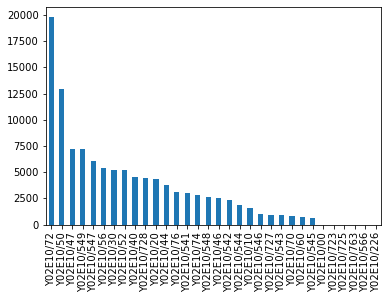

In [201]:
get_total_cluster_counts(tp5_predictions).plot(kind='bar')
plt.show()

# TP6 1980 - 2020

In [197]:
df = pd.read_csv('adf_with_citation_vectors.csv', index_col=0)
#df_vector = df.drop(columns=['original_index','lens_id','date_published','cpc_codes','cpc_codes_3','cited_by','patent_count', 'cited_by.1','patent_count.1'])
df_vector = df.drop(columns=['original_index','lens_id','date_published','cpc_codes','cpc_codes_3','cited_by','patent_count', 'cited_by.1','patent_count.1','invention_title'])


df_dropped = df_vector.loc[(df_vector!=0).any(axis=1)]
df_dropped = df_dropped.loc[:, (df_dropped != 0).any(axis=0)]

df_dropped.replace([np.inf, -np.inf], np.nan, inplace=True)
df_dropped = df_dropped.fillna(0)
df_dropped.isnull().sum(axis = 0)


df_vector_cpc = df.drop(columns=['original_index','lens_id','date_published','cpc_codes_3','cited_by','patent_count', 'cited_by.1','patent_count.1'])
#df_vector_cpc = df.drop(columns=['original_index','lens_id','date_published','cpc_codes_3','cited_by','patent_count', 'cited_by.1','patent_count.1','invention_title'])
df_cpc = df_vector_cpc[['cpc_codes','invention_title']]

df_vector_cpc = df_dropped.join(df_cpc)
df_vector_cpc = df_vector_cpc.reset_index(inplace = False) #remember to re index prior to merge with predictions
df_vector_cpc


# normalize the data attributes
df_normalized = preprocessing.normalize(df_dropped)
data_normalized = pd.DataFrame(df_normalized, columns=df_dropped.columns)
X = data_normalized 

In [198]:
hc = AgglomerativeClustering(n_clusters= 3,distance_threshold= None, affinity = 'euclidean', linkage ='ward')
y_tp6 = hc.fit_predict(X)
y_tp6 = pd.DataFrame(y_tp6, columns = ['Y'])
y_tp6

,Y
0,1
1,1
2,0
3,2
4,0
...,...
62042,2
62043,1
62044,2
62045,1


In [199]:
df_combined_6 = df_vector_cpc.join(y_tp6)
tp6_predictions = df_combined_6[['cpc_codes','Y','invention_title']]
tp6_predictions

,cpc_codes,Y,invention_title
0,"['F03B13/105', 'F03B13/105', 'F03B3/128', 'F03...",1,['Rotor withdrawal arrangement for bulb genera...
1,"['F03B7/00', 'F03B7/00', 'F03B11/002', 'F03B11...",1,['Recirculating submersible turbine']
2,"['F24S10/10', 'Y02E10/44']",0,['Polymer-gel covered solar energy collector a...
3,"['H01L31/03921', 'H01L31/062', 'H01L31/075', '...",2,['Semiconductor photoelectric conversion device']
4,"['G05F1/67', 'G05F1/67', 'Y02E10/56', 'Y02E10/...",0,['Pulsed motor starter for use with a photovol...
...,...,...,...
62042,"['H01L27/1218', 'H01L27/124', 'H01L27/1218', '...",2,['DISPLAY DEVICE']
62043,"['E04H9/0215', 'E04H9/0215', 'F03D13/20', 'F16...",1,['ARRANGEMENTS AND METHODS FOR DAMPING OSCILLA...
62044,"['C07D495/20', 'C07D495/22', 'H01L51/0061', 'H...",2,['DISPIRO-OXEPINE/THIAPINE DERIVATIVES FOR OPT...
62045,"['F03D7/0284', 'F03D9/255', 'F05B2220/70646', ...",1,['System and Method for Minimizing Inrush of C...


In [200]:
for i in range(3):
    get_cpc_cluster_count(tp6_predictions, i, cpc_stem='Y02E10/')
    print()
    

CLUSTER 0
Y02E10/47     8366
Y02E10/50     7878
Y02E10/56     6380
Y02E10/40     4488
Y02E10/44     3785
Y02E10/52     2761
Y02E10/76     1530
Y02E10/10     1366
Y02E10/46     1346
Y02E10/60      817
Y02E10/72      773
Y02E10/547     244
Y02E10/549     196
Y02E10/544     170
Y02E10/30      146
Y02E10/728     146
Y02E10/542     137
Y02E10/541     128
Y02E10/548     124
Y02E10/20       75
Y02E10/546      32
Y02E10/543      28
Y02E10/74       23
Y02E10/727      20
Y02E10/545      15
Y02E10/70        4
Y02E10/45        1
Y02E10/00        1
Y02E10/566       1
dtype: int64

CLUSTER 1
Y02E10/72     23612
Y02E10/30      6031
Y02E10/728     5183
Y02E10/20      5095
Y02E10/74      3262
Y02E10/76      2551
Y02E10/46      1411
Y02E10/727     1229
Y02E10/70       960
Y02E10/56       584
Y02E10/50       514
Y02E10/10       349
Y02E10/40       219
Y02E10/47       192
Y02E10/44       187
Y02E10/52        78
Y02E10/60        37
Y02E10/549        7
Y02E10/542        3
Y02E10/541        3
Y02E10/00      

In [202]:
get_cpc_cluster_count1(tp6_predictions, 0) / get_total_cluster_counts(tp6_predictions)

Y02E10/00     0.333333
Y02E10/10     0.790967
Y02E10/20     0.014468
Y02E10/226         NaN
Y02E10/30     0.023526
Y02E10/40     0.889770
Y02E10/44     0.917131
Y02E10/45     1.000000
Y02E10/46     0.483999
Y02E10/47     0.958524
Y02E10/50     0.487289
Y02E10/52     0.440210
Y02E10/541    0.037915
Y02E10/542    0.048599
Y02E10/543    0.028028
Y02E10/544    0.073213
Y02E10/545    0.024390
Y02E10/546    0.029657
Y02E10/547    0.035746
Y02E10/548    0.043115
Y02E10/549    0.018272
Y02E10/56     0.896823
Y02E10/566    1.000000
Y02E10/60     0.851929
Y02E10/70     0.004145
Y02E10/72     0.031630
Y02E10/722         NaN
Y02E10/723         NaN
Y02E10/725         NaN
Y02E10/727    0.016013
Y02E10/728    0.027397
Y02E10/74     0.006993
Y02E10/76     0.373626
Y02E10/763         NaN
dtype: float64

In [203]:
get_cpc_cluster_count1(tp6_predictions, 1) / get_total_cluster_counts(tp6_predictions)

Y02E10/00     0.666667
Y02E10/10     0.202085
Y02E10/20     0.982832
Y02E10/226    1.000000
Y02E10/30     0.971801
Y02E10/40     0.043418
Y02E10/44     0.045311
Y02E10/45          NaN
Y02E10/46     0.507371
Y02E10/47     0.021998
Y02E10/50     0.031793
Y02E10/52     0.012436
Y02E10/541    0.000889
Y02E10/542    0.001064
Y02E10/543         NaN
Y02E10/544         NaN
Y02E10/545    0.001626
Y02E10/546    0.000927
Y02E10/547    0.000293
Y02E10/548         NaN
Y02E10/549    0.000653
Y02E10/56     0.082092
Y02E10/566         NaN
Y02E10/60     0.038582
Y02E10/70     0.994819
Y02E10/72     0.966161
Y02E10/722    1.000000
Y02E10/723    1.000000
Y02E10/725    1.000000
Y02E10/727    0.983987
Y02E10/728    0.972603
Y02E10/74     0.991791
Y02E10/76     0.622955
Y02E10/763    1.000000
dtype: float64

In [204]:
get_cpc_cluster_count1(tp6_predictions, 2) / get_total_cluster_counts(tp6_predictions)

Y02E10/00          NaN
Y02E10/10     0.006948
Y02E10/20     0.002701
Y02E10/226         NaN
Y02E10/30     0.004673
Y02E10/40     0.066812
Y02E10/44     0.037558
Y02E10/45          NaN
Y02E10/46     0.008630
Y02E10/47     0.019478
Y02E10/50     0.480918
Y02E10/52     0.547353
Y02E10/541    0.961197
Y02E10/542    0.950337
Y02E10/543    0.971972
Y02E10/544    0.926787
Y02E10/545    0.973984
Y02E10/546    0.969416
Y02E10/547    0.963961
Y02E10/548    0.956885
Y02E10/549    0.981076
Y02E10/56     0.021085
Y02E10/566         NaN
Y02E10/60     0.109489
Y02E10/70     0.001036
Y02E10/72     0.002210
Y02E10/722         NaN
Y02E10/723         NaN
Y02E10/725         NaN
Y02E10/727         NaN
Y02E10/728         NaN
Y02E10/74     0.001216
Y02E10/76     0.003419
Y02E10/763         NaN
dtype: float64

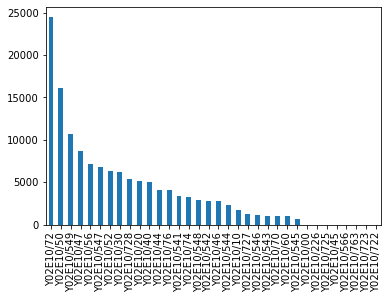

In [205]:
get_total_cluster_counts(tp6_predictions).plot(kind='bar')
plt.show()